| [⬅️ Previous Session](practice_4-1_pandas.ipynb) | [🏠 Course Home](../index.ipynb)

# Session 5-1: Matplotlib 📈

![mpl](./assets/mpl.png)



**Don't forget to start your notebook with a cell containing the import statements you need for the session.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 📚  <b> Practice 1. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac1.png" alt="prac1" width="600"/>

C:\Users\annar\AppData\Local\Temp\ipykernel_20736\4204939679.py:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


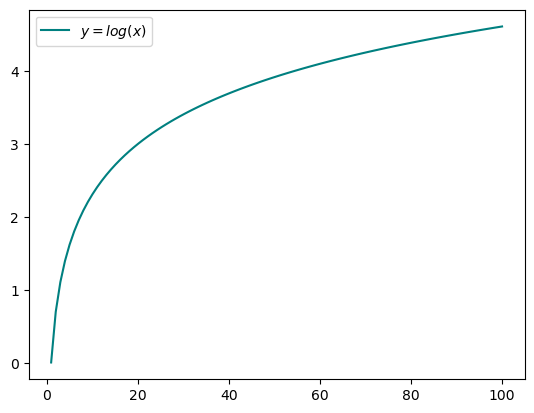

In [10]:
x = np.linspace(0,100,100)
y = np.log(x)

plt.plot(x,y, color='teal', label=r'$y = log(x)$')

plt.legend()
# fig = plt.figure()

# ax = fig.add_subplot(1,1,1)
# ax.plot()

## 📚  <b> Practice 2. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac2.png" alt="prac2" width="600"/>

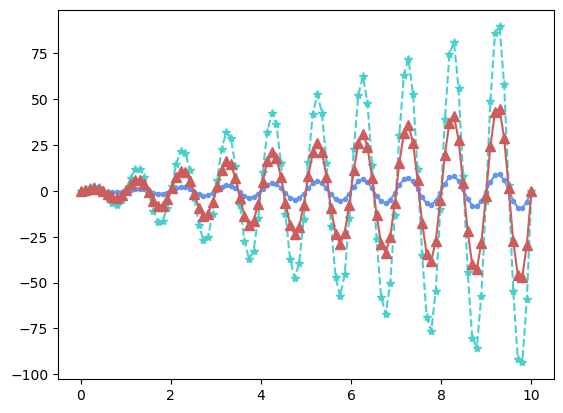

In [57]:
x2 = np.linspace(0,10,100)
y2 = x2 * (np.sin(2*(np.pi)*x2))

fig2 = plt.figure()

plt.plot(x2, (y2), color='cornflowerblue', marker='o', markersize=3)  #linestyle='-.', linewidth=1)
plt.plot(x2, (10 * y2), color='mediumturquoise', marker='*', linestyle='--')
plt.plot(x2, (5 * y2), color='indianred', marker='^', markersize=7)




## 📚  <b> Practice 3. </b> 

Import the data from `./data/BSRN_data.csv` and plot the temperature and relative humidity over the month of October 2019 at the BSRN station. Be sure to format the timestamps and include axis labels, a title, and a legend, if necessary.



In [58]:
bsrn = pd.read_csv('../data/BSRN_GOB_2019-10.csv',index_col=0,parse_dates=True)

[Text(18170.0, 0, '01-Oct-19'),
 Text(18174.0, 0, '05-Oct-19'),
 Text(18178.0, 0, '09-Oct-19'),
 Text(18182.0, 0, '13-Oct-19'),
 Text(18186.0, 0, '17-Oct-19'),
 Text(18190.0, 0, '21-Oct-19'),
 Text(18194.0, 0, '25-Oct-19'),
 Text(18198.0, 0, '29-Oct-19'),
 Text(18201.0, 0, '01-Nov-19')]

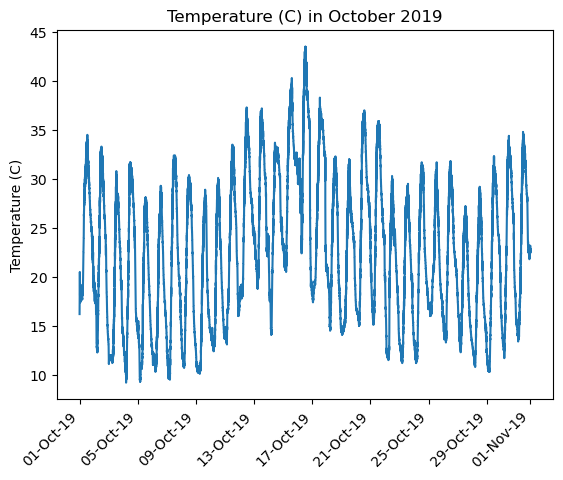

In [68]:
fig3 = plt.figure()
ax = fig3.add_subplot(1,1,1)

plt.plot(bsrn.index, bsrn.T_degC)

ax.set_ylabel(r'Temperature (C)')
ax.set_title("Temperature (C) in October 2019")

# Format timestamps
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
# Format and rotate ticks
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax.get_xticklabels()

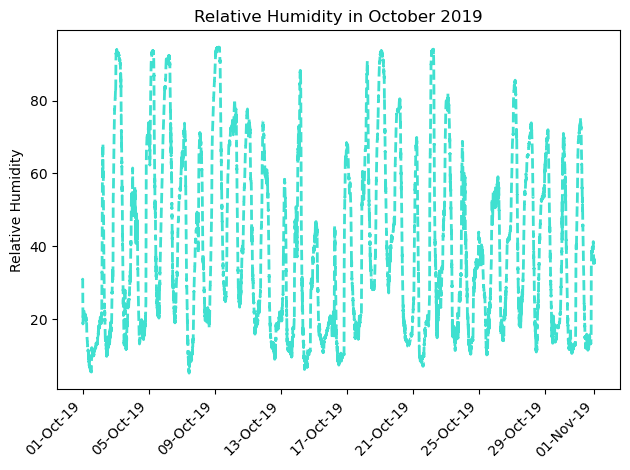

In [80]:
fig4 = plt.figure()
ax1 = fig4.add_subplot(1,1,1)

plt.plot(bsrn.index, bsrn.RH, linestyle='--', color='turquoise', linewidth=2)
#plt.plot(bsrn.index, bsrn.T_degC)


ax1.set_ylabel(r'Relative Humidity')
ax1.set_title("Relative Humidity in October 2019")

# Format timestamps
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
# Format and rotate ticks
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax1.get_xticklabels()
plt.tight_layout()

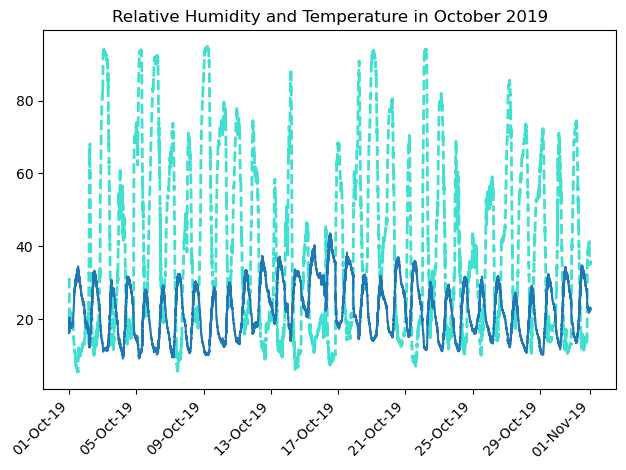

In [79]:
fig5 = plt.figure()
ax2 = fig5.add_subplot(1,1,1)

plt.plot(bsrn.index, bsrn.RH, linestyle='--', color='turquoise', linewidth=2)
plt.plot(bsrn.index, bsrn.T_degC)


#ax2.set_ylabel(r'Relative Humidity')
ax2.set_title("Relative Humidity and Temperature in October 2019")

# Format timestamps
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
# Format and rotate ticks
plt.setp(ax2.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax2.get_xticklabels()
plt.tight_layout()

## 📚 Practice 4.

Saturation vapor pressure, \( $ e^*(T_a) $ \), is the maximum pressure of water vapor that can exist in equilibrium above a flat plane of water at a given temperature. It can be calculated from the Tetens equation:

$$ e^{*}(T_{a}) = a \times exp({\frac{b \cdot T_{a}}{T_{a} + c}}) $$

where $ T_a $ is the air temperature in °C, $ a = 0.611  $ kPa,  $ b = 17.502  $, and  $ c = 240.97 °C  $.

1. Calculate \( $ e^*(T_a) $ \) in kPa for all temperatures in `bsrn`.


In [83]:
t_a = bsrn.T_degC 
eta = 0.611 * (np.exp((17.502*t_a)/(t_a + 240.97)))
#eta

2. Plot temperature vs. saturation vapor pressure for the BSRN station. Be sure to format your plot appropriately and include axis labels, a title, and a legend, if necessary.


Text(0.5, 1.0, 'Saturation vapor pressure as a function of Temperature')

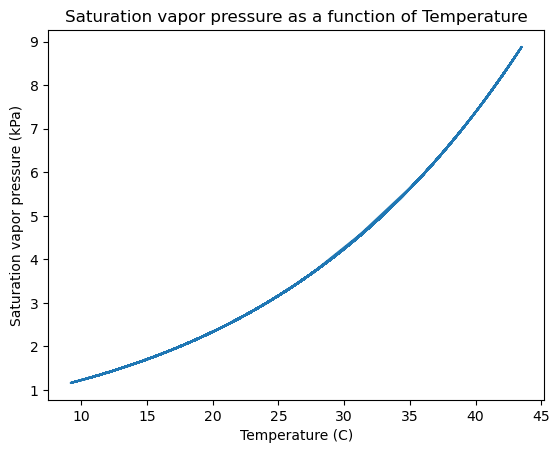

In [89]:
fig_p4 = plt.figure()

plt.plot(bsrn.T_degC, eta)

plt.xlabel('Temperature (C)')
plt.ylabel('Saturation vapor pressure (kPa)')
plt.title("Saturation vapor pressure as a function of Temperature")

3. Compare your plot to Figure 3-1 in Campbell and Norman (1998), included below. Do they look more or less the same?

![cn](./assets/campbell_norman_fig3-1.png)


## 📚  <b> Practice 5. </b> 
The difference between saturation vapor pressure and ambient air pressure is called vapor pressure deficit, $\textit{VPD}$. $\textit{VPD}$ can be calculated from saturation vapor pressure and relative humidity, $h_r$, as follows:
$$ \textit{VPD} \, = \, e^*(T_a) \cdot (1 \, - \, h_r)$$
where $h_r$ is expressed as a fraction.

1. Calculate the vapor pressure deficit for the BSRN data.


In [121]:
bsrn['frac_RH'] = bsrn.RH/100
vpd = eta * (1 - bsrn.frac_RH)
vpd


DATE
2019-10-01 00:00:00    1.275229
2019-10-01 00:01:00    1.291585
2019-10-01 00:02:00    1.303583
2019-10-01 00:03:00    1.305458
2019-10-01 00:04:00    1.328672
                         ...   
2019-10-31 23:55:00    1.808059
2019-10-31 23:56:00    1.821856
2019-10-31 23:57:00    1.816482
2019-10-31 23:58:00    1.819289
2019-10-31 23:59:00    1.835979
Length: 44640, dtype: float64

In [122]:

bsrn['VPD'] = vpd


2. Calculate the mean hourly $RH$ and $\textit{VPD}$ over the entire month.


In [123]:
rh_hr = bsrn.frac_RH[::60]
#m_rh = np.mean(rh_hr)
# rh_hr

In [124]:
rh_hours = []
for hour in bsrn.index.hour.unique():
    this_hour = bsrn.index.hour == hour
    mean_rh = bsrn[this_hour]['frac_RH'].mean()
    rh_hours.append(mean_rh)

In [125]:
vpd_hours = []
for hour in bsrn.index.hour.unique():
    this_hour = bsrn.index.hour == hour
    mean_vpd = bsrn[this_hour]['VPD'].mean()
    vpd_hours.append(mean_vpd)

vpd_hours

[0.9130824440457405,
 0.8231447100175937,
 0.748051261562766,
 0.6919764885059619,
 0.6283639416466528,
 0.7136940445366475,
 0.9655780152682469,
 1.4307034932391856,
 2.033164901774866,
 2.738815446019668,
 3.398647333289081,
 3.8260565315363717,
 3.9710451200679837,
 3.8531430408817724,
 3.7248316848639975,
 3.466521987449678,
 3.1075066897523445,
 2.7159328245235503,
 2.3894400046044946,
 2.075986362236895,
 1.6773468982518507,
 1.4026458146293348,
 1.1925362019657484,
 1.0423402218707385]

3. Plot $RH$ and $\textit{VPD}$ as a function of time of day. (for extra python points, try plotting both variables on one plot using [ax.twinx()](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html))


In [117]:
hours = bsrn.index.hour.unique()
hours

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='DATE')

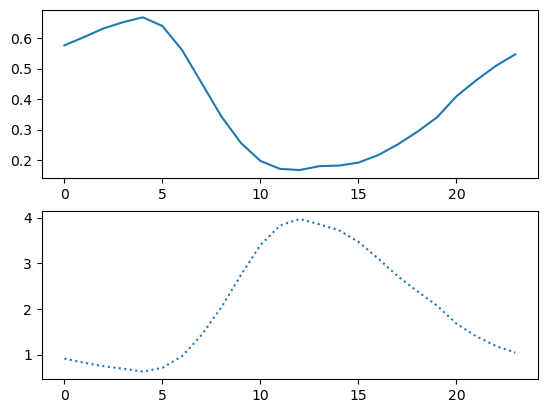

In [128]:
p5_fig = plt.figure()

ax_1 = p5_fig.add_subplot(2,1,1)
ax_2 = p5_fig.add_subplot(2,1,2)


ax_1.plot(hours, rh_hours)
ax_2.plot(hours, vpd_hours, linestyle=':')

In [149]:
ax_twin1.tick_params?

Signature: ax_twin1.tick_params(axis='both', **kwargs)
Docstring:
Change the appearance of ticks, tick labels, and gridlines.

Tick properties that are not explicitly set using the keyword
arguments remain unchanged unless *reset* is True. For the current
style settings, see `.Axis.get_tick_params`.

Parameters
----------
axis : {'x', 'y', 'both'}, default: 'both'
    The axis to which the parameters are applied.
which : {'major', 'minor', 'both'}, default: 'major'
    The group of ticks to which the parameters are applied.
reset : bool, default: False
    Whether to reset the ticks to defaults before updating them.

Other Parameters
----------------
direction : {'in', 'out', 'inout'}
    Puts ticks inside the Axes, outside the Axes, or both.
length : float
    Tick length in points.
width : float
    Tick width in points.
color : color
    Tick color.
pad : float
    Distance in points between tick and label.
labelsize : float or str
    Tick label font size in points or as a string (

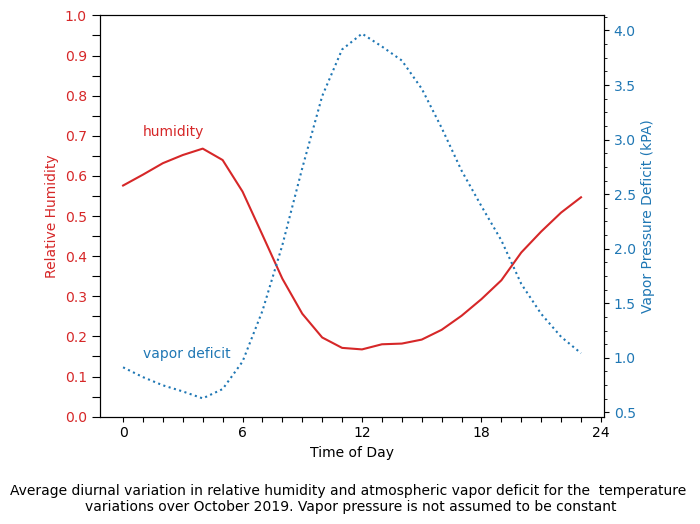

In [222]:

# Create some mock data
# t = np.arange(0.01, 10.0, 0.01)
# data1 = np.exp(t)
# data2 = np.sin(2 * np.pi * t)

from matplotlib.ticker import AutoMinorLocator

fig_twin, ax_twin1 = plt.subplots()

color = 'tab:red'
ax_twin1.set_xlabel('Time of Day')
ax_twin1.set_ylabel('Relative Humidity', color=color)
ax_twin1.plot(hours, rh_hours, color=color)
ax_twin1.tick_params(axis='y', which='major',length=6, labelcolor=color)
ax_twin1.tick_params(axis='y', which='minor',length=3, labelcolor=color)
ax_twin1.tick_params(axis='x',which='both',  labelcolor='k')
#ax_twin1.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax_twin1.minorticks_on()
ax_twin1.set_yticks(ticks=[0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00],labels=['0.0','','0.1','','0.2','','0.3','','0.4','','0.5','','0.6','','0.7','','0.8','','0.9','','1.0'])
ax_twin1.set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],labels=['0','','','','','','6','','','','','','12','', '','','','','18','','','','','','24'])
ax_twin1.text(1,0.7,'humidity',color=color)


ax_twin2 = ax_twin1.twinx()  # instantiate a second axes that shares the same x-axis

# set color for second twin plot 
color = 'tab:blue'
# set y label and color
ax_twin2.set_ylabel('Vapor Pressure Deficit (kPA)', color=color)  # we already handled the x-label with ax1
# plot VPD(y-axis) on hours(x-axis) with dotted line style
ax_twin2.plot(hours, vpd_hours, color=color, linestyle=':')
# set y-axis ticks for VPD using set color
ax_twin2.tick_params(axis='y', labelcolor=color)
# consistent x-ticks
ax_twin2.tick_params(axis='x',which='both', labelcolor='k')
# specify more x-ticks to better match the goal graph, using more hours for better readability
ax_twin2.set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],labels=['0','','','','','','6','','','','','','12','', '','','','','18','','','','','','24'])
# labelling line in-plot
ax_twin2.text(1,1,'vapor deficit',color=color)
ax_twin2.yaxis.set_minor_locator(AutoMinorLocator(4))

# setting figure caption
caption='''Average diurnal variation in relative humidity and atmospheric vapor deficit for the  temperature 
variations over October 2019. Vapor pressure is not assumed to be constant'''
plt.figtext(0.5, -0.05, caption, ha='center', va='center')
#plt.suptitle(x=0.1, y=-0.05,"Average diurnal variation in relative humidity and atmospheric vapor deficit")

fig_twin.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

4. How does relative humidity vary throughout the day? Why?


Relative humidity is lowest when the sun is at its apex 
- when the sun is at its strongest, water evaporates until there is very little left and relative humidity decreases
- when the sun sets and temperatures cool, water vapor condenses and relative humidity increases

5. Compare your plot(s) to Figure 3-3 in Campbell and Norman (1998). How do the values of $e^*(T_a)$ and $\textit{VPD}$ for the BSRN station compare to those at constant vapor pressure in Figure 3-3?

![cn](./assets/campbell_norman_fig3-3.png)


The variations in vapor pressure in the bsrn dataset result in a greater fluctuation and greater maxima of the VPD in our graph -- max of nearly 4.0 compared to the Campbell and Norman (1998) study's max VPD of roughly 2.0.

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>